## Github Link
https://github.com/DariusTata/everythingcounts-assignment1

##### Import some useful libraries

In [1]:
#!pip install pingouin

In [2]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.weightstats as smw
import numpy as np
import random
import pandas as pd
#import pingouin as pg
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

# About the dataset from Kaggle  
`https://www.kaggle.com/datasets/mrisdal/fact-checking-facebook-politics-pages`  

### About the dataset  
These data were collected to investigate the "fake news" phenomenon during the 2016 US presidential election, where misleading and untrue stories often spread rapidly over social media. BuzzFeed News analysed over 1,000 stories from nine different political Facebook pages: six hyperpartisan pages from the left and right, and three mainstream media Facebook pages to determine the nature and popularity of false or misleading information shared.  
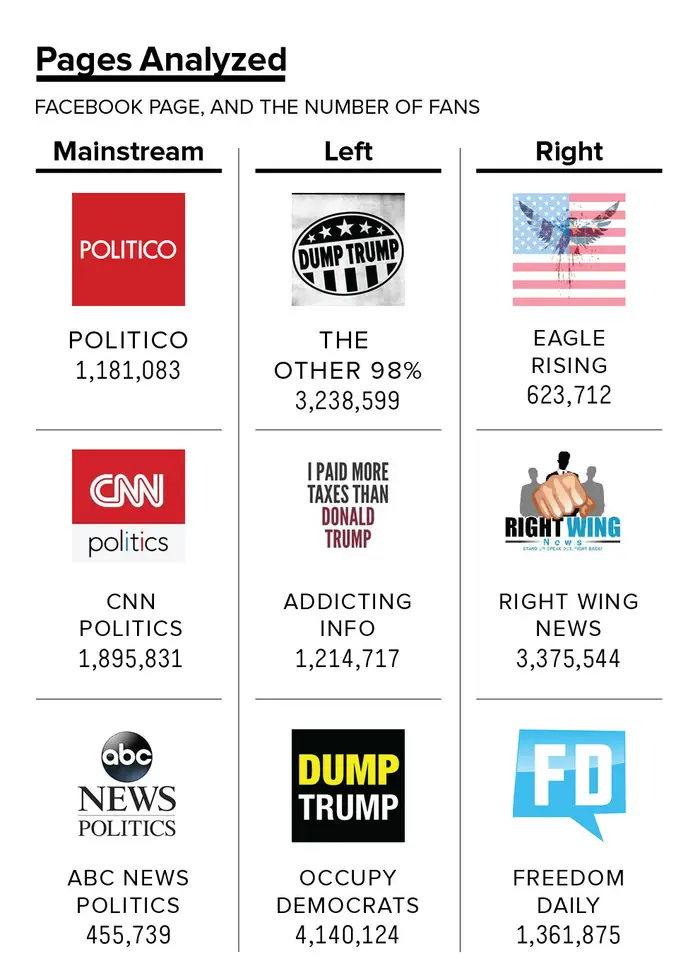  
Numbers shown are as of October 17th 2016. Image source: BuzzFeed News.  

The dataset supports the original story "Hyperpartisan Facebook Pages Are Publishing False And Misleading Information At An Alarming Rate", published October 20th 2016. Here is a link to the story: `https://www.buzzfeednews.com/article/craigsilverman/partisan-fb-pages-analysis`  

### Data Collection Methodology
These data were collected by the BuzzFeed News team. Over the span of seven week days (September 19th to 23th and September 26th and 27th), they recorded and fact-checked every post published by the nine Facebook pages. Posts were rated by the team as "mostly true", "mixture of true and false", "mostly false", or "no factual content". "No factual content" was applied when the team encountered a post that was satirical or opinion-driven, or that otherwise lacked a factual claim.  

The article details BuzzFeed News followed a three person approval process for fact-checking content. First, person A would label the content per the labels mentioned. If they were unsure about a labelling they could request for person B to review their labelling. Any discrepancies between person A and B would be resolved by person C. Person C also conducted a final review of all posts that were rated "mostly false" to ensure they warranted that rating.  

### Initial data limitations identified  
* While an individual's bias in rating is somewhat addressed by the three-person rating process, organisational bias at BuzzFeed is not accounted for.
* The 'left' Facebook pages each have many more members than the 'right' pages. Assuming a post's number of shares and number of comments has a relationship to the number of page fans, this may distort these data measures.
* Conducting a final review of only "mostly false" labelled posts may introduce bias, as other ratings were not checked as diligently. 

| Category | Facebook Page | Fans | % of Total Fans |
|----------|---------------|------|-----------------|
| Mainstream | | 3532653 | **20.20%** |
| | Politico | 1181083 | 6.75% |
| | CNN | 1895831 | 10.84% |
| | ABC News Politics | 455739 | 2.61% |
| Left | | 8593440 | **49.14%** |
| | The Other 98% | 3238599 | 18.52% |
| | Addicting Info | 1214717 | 6.95% |
| | Occupy Democrats | 4140124 | 23.68% |
| Right | | 5361131 | **30.66%** |
| | Eagle Rising | 623712 | 3.57% |
| | Right Wing News | 3375544 | 19.30% |
| | Freedom Daily | 1361875 | 7.79% |
| Total | | 17487224 | | * It is likely some persons may be fans of multiple groups, therefore the percentage column likely suffers from a double-counting error and should be treated as an estimate.

In [3]:
#import csv file as dataframe 
posts = pd.read_csv('facebook-fact-check.csv')
posts

,account_id,post_id,Category,Page,Post URL,Date Published,Post Type,Rating,Debate,share_count,reaction_count,comment_count
0,184096565021911,1035057923259100,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,video,no factual content,NaN,NaN,146.0,15.0
1,184096565021911,1035269309904628,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,link,mostly true,NaN,1.0,33.0,34.0
2,184096565021911,1035305953234297,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,link,mostly true,NaN,34.0,63.0,27.0
3,184096565021911,1035322636565962,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,link,mostly true,NaN,35.0,170.0,86.0
4,184096565021911,1035352946562931,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,video,mostly true,NaN,568.0,3188.0,2815.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2277,114517875225866,1472393822771591,left,The Other 98%,https://www.facebook.com/TheOther98/posts/1472...,2016-09-27,photo,no factual content,NaN,21563.0,33388.0,391.0
2278,114517875225866,1472419749435665,left,The Other 98%,https://www.facebook.com/TheOther98/posts/1472...,2016-09-27,link,mostly true,NaN,1451.0,4828.0,342.0
2279,114517875225866,1472551312755842,left,The Other 98%,https://www.facebook.com/TheOther98/posts/1472...,2016-09-27,link,mixture of true and false,NaN,8236.0,12083.0,856.0
2280,114517875225866,1472557792755194,left,The Other 98%,https://www.facebook.com/TheOther98/posts/1472...,2016-09-27,link,mostly true,yes,3985.0,12966.0,538.0


In [4]:
#dataframe info
posts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2282 entries, 0 to 2281
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   account_id      2282 non-null   int64  
 1   post_id         2282 non-null   int64  
 2   Category        2282 non-null   object 
 3   Page            2282 non-null   object 
 4   Post URL        2282 non-null   object 
 5   Date Published  2282 non-null   object 
 6   Post Type       2282 non-null   object 
 7   Rating          2282 non-null   object 
 8   Debate          298 non-null    object 
 9   share_count     2212 non-null   float64
 10  reaction_count  2280 non-null   float64
 11  comment_count   2280 non-null   float64
dtypes: float64(3), int64(2), object(7)
memory usage: 214.1+ KB


### Initial Exploration  
The dataframe info shown above details the data type of each column. First we explore if there is a relationship between the political alignment of a Facebook page (`Category`) and the virality of it's posts.  

The below plot shows in this dataset left-wing pages had a higher comment count (orange) and a much higher share count (blue). Considering one of the limitations mentioned earlier, that left-wing pages are overrepresented in terms of fans in this dataset, this is not unexpected. It may be reasonable to think that the relationship between Page fans and share_count is non-linear due to network effects.

<Axes: xlabel='Category', ylabel='share_count'>

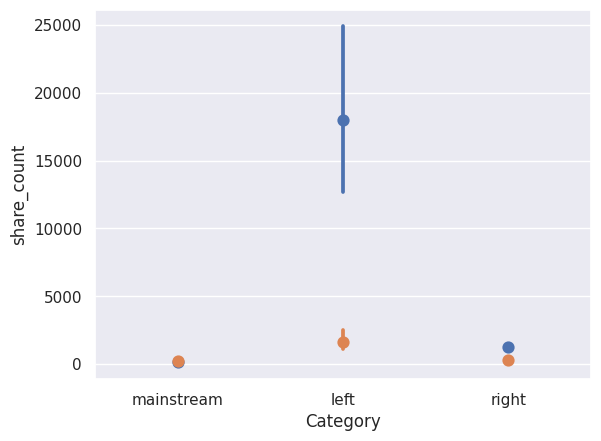

In [5]:
sns.pointplot(x = 'Category', y = 'share_count', data = posts, linestyle='none')
sns.pointplot(x = 'Category', y = 'comment_count', data = posts, linestyle = 'none')

If share_count is skewed due to left-wing pages accounting for about 49% of fans of pages in the dataset, perhaps the relationship with comment_count is more linear. It should be expected that `Category: left` pages have the highest comment_count, but what is perhaps more interesting is it also has the largest spread for each `Rating`.

<Axes: xlabel='Rating', ylabel='comment_count'>

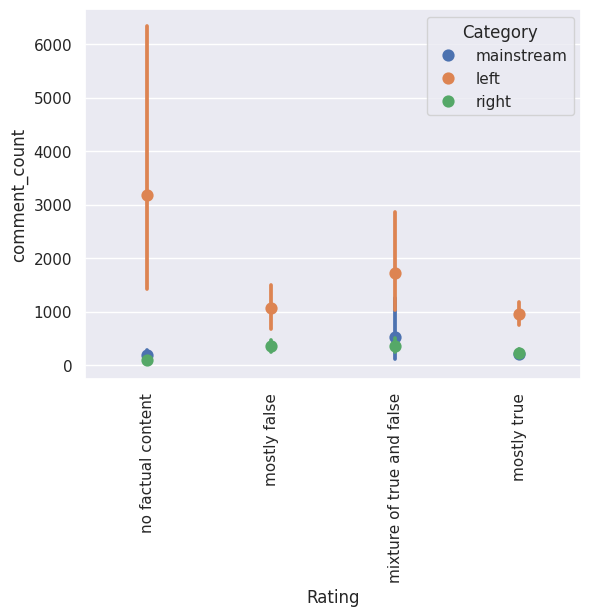

In [6]:
plt.xticks(rotation=90)
rating_order = ['no factual content', 'mostly false', 'mixture of true and false', 'mostly true']
sns.pointplot(x = 'Rating', y = 'comment_count', hue = 'Category', order = rating_order, data=posts, linestyle = 'none')

### Cacluating the mean for a Categorical Variable  
Let's look at the measures of truth we have in our dataset. The `Rating` column is the rating given by BuzzFeed News following their three person approval process.  
| # | `Rating` |
|---|----------|
| - | No Factual Content |
| 1 | Mostly False |
| 2 | Mixture of True and False |
| 3 | Mostly True |


However, these categories are not all directly comparable. `No Factual Content` determines if there is any facts, where as the other three all show some progression of more-to-less factuality. Let's consider two measures: 

|  | Veracity | Accuracy |
|--|----------|----------|
| Description | Whether or not a post has a basis in facts. | The degree to which a post follows the facts. |
| df Column | `is_opinion` | `rating_int` |
| Possible values | 0 or 1 | 1 , 2 , or 3 |

To numerically evaluate the categorical variable `Category` (ie Mainstream/Left/Right) we need to assign a value for each. Below I create new columns `rating_int` and `is_opinion`.

In [7]:
#initialise 'rating_int' column
posts['rating_int'] = np.NaN

#iterate over each row and assign value to 'rating_int' field depending on 'Rating' value
for i, row in posts.iterrows():
    if row['Rating'] == 'mostly false':
        posts.at[i, 'rating_int'] = 1
    elif row['Rating'] == 'mixture of true and false':
        posts.at[i, 'rating_int'] = 2
    elif row['Rating'] == 'mostly true':
        posts.at[i, 'rating_int'] = 3


In [8]:
#initialise 'is_opinion' column
posts['is_opinion'] = np.NaN

#iterate over each row and assign value to 'rating_int' field depending on 'Rating' value
for i, row in posts.iterrows():
    if row['Rating'] == 'no factual content':
        posts.at[i, 'is_opinion'] = 1
    else :
        posts.at[i, 'is_opinion'] = 0

posts

,account_id,post_id,Category,Page,Post URL,Date Published,Post Type,Rating,Debate,share_count,reaction_count,comment_count,rating_int,is_opinion
0,184096565021911,1035057923259100,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,video,no factual content,NaN,NaN,146.0,15.0,NaN,1.0
1,184096565021911,1035269309904628,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,link,mostly true,NaN,1.0,33.0,34.0,3.0,0.0
2,184096565021911,1035305953234297,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,link,mostly true,NaN,34.0,63.0,27.0,3.0,0.0
3,184096565021911,1035322636565962,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,link,mostly true,NaN,35.0,170.0,86.0,3.0,0.0
4,184096565021911,1035352946562931,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,video,mostly true,NaN,568.0,3188.0,2815.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2277,114517875225866,1472393822771591,left,The Other 98%,https://www.facebook.com/TheOther98/posts/1472...,2016-09-27,photo,no factual content,NaN,21563.0,33388.0,391.0,NaN,1.0
2278,114517875225866,1472419749435665,left,The Other 98%,https://www.facebook.com/TheOther98/posts/1472...,2016-09-27,link,mostly true,NaN,1451.0,4828.0,342.0,3.0,0.0
2279,114517875225866,1472551312755842,left,The Other 98%,https://www.facebook.com/TheOther98/posts/1472...,2016-09-27,link,mixture of true and false,NaN,8236.0,12083.0,856.0,2.0,0.0
2280,114517875225866,1472557792755194,left,The Other 98%,https://www.facebook.com/TheOther98/posts/1472...,2016-09-27,link,mostly true,yes,3985.0,12966.0,538.0,3.0,0.0


### Whats the average Veracity and Accuracy of the posts in the dataset?  
Using the `describe()`, `median()`, and `mode()` methods shows the following averages:

|Average Type | rating_int | is_opinion |
|-------------|------------|------------|
| Mean | **3** (2.775520) | **0** (0.115688) |
| Median | **3** | **0** |
| Mode | **3** | **0** |

This corresponds to an average post Veracity of **some basis in fact** and average post Accuracy of **mostly true**.

In [9]:
posts.describe()

,account_id,post_id,share_count,reaction_count,comment_count,rating_int,is_opinion
count,2.282000e+03,2.282000e+03,2.212000e+03,2280.000000,2280.000000,2018.000000,2282.000000
mean,1.867111e+14,3.299586e+15,4.044816e+03,5364.284649,516.102193,2.775520,0.115688
std,1.393826e+14,3.808724e+15,2.983192e+04,19126.544561,3569.355445,0.526591,0.319921
min,6.231759e+10,5.510967e+14,1.000000e+00,2.000000,0.000000,1.000000,0.000000
25%,1.145179e+14,1.247441e+15,2.400000e+01,149.000000,37.000000,3.000000,0.000000
50%,1.840966e+14,1.290536e+15,9.600000e+01,545.500000,131.500000,3.000000,0.000000
75%,3.469371e+14,1.540752e+15,7.390000e+02,2416.750000,390.250000,3.000000,0.000000
max,4.401065e+14,1.015386e+16,1.088995e+06,456458.000000,159047.000000,3.000000,1.000000


In [10]:
print('The median rating_int of posts is: ', posts['rating_int'].median())

The median rating_int of posts is:  3.0


In [11]:
print('The mode rating_int of posts is: ', posts['rating_int'].mode())

The mode rating_int of posts is:  0    3.0
Name: rating_int, dtype: float64


In [12]:
print('The median is_opinion of posts is: ', posts['is_opinion'].median())

The median is_opinion of posts is:  0.0


In [13]:
print('The mode is_opinion of posts is: ', posts['is_opinion'].mode())

The mode is_opinion of posts is:  0    0.0
Name: is_opinion, dtype: float64


### Accuracy frequency by Category
As shown below, all three political categories have a majority of posts labelled as `mostly true`, which corresponds to `3` on our column `rating_int` as a measure of **accuracy**. Notably, the mainstream category has more than three times the next highest number of `mostly true` stories.  
Also notably absent is the mainstream from the other spaces on the accuracy scale. While there seems to be some accuracy-proportionality for left and right, the overwhelming majority of veracious mainstream posts in the dataset have an **accuracy** of `mostly true`.

Text(0, 0.5, 'Number of Posts')

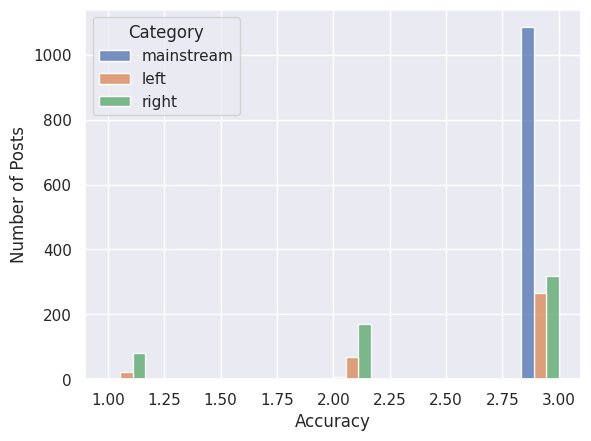

In [14]:
sns.histplot(data=posts, x='rating_int', hue='Category', multiple='dodge')
plt.xlabel('Accuracy')
plt.ylabel('Number of Posts')

### Veracity frequency by Category
What is striking however is the proportion of mainstream posts which are opinion, satire or jokes: labelled `no factual content` by the BuzzFeed News team.

<Axes: xlabel='Category', ylabel='Count'>

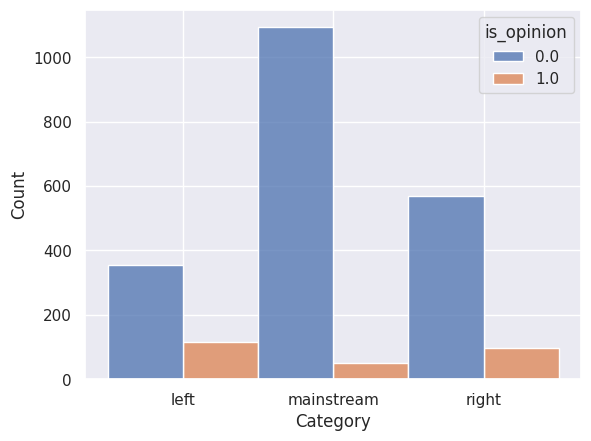

In [15]:
#order Category so that the graph x-axis labels are intuitive
posts['Category'] = pd.Categorical(posts['Category'], ['left','mainstream','right'])

sns.histplot(data=posts,
             x='Category', 
             hue='is_opinion', 
             multiple='dodge')

Breaking down these data further shows quite a high variation in the proportionality of non-veracious posts (ie falling outside our Accuracy scale) versus veracious posts (ie falling somewhere on our Accuracy scale) depending on the Facebook Page.

/tmp/ipykernel_452/2035249952.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g1.set_xticklabels(g1.get_xticklabels(), rotation=90)
/tmp/ipykernel_452/2035249952.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g2.set_xticklabels(g2.get_xticklabels(), rotation=90)


[Text(0, 0, 'The Other 98%'),
 Text(1, 0, 'Addicting Info'),
 Text(2, 0, 'Occupy Democrats'),
 Text(3, 0, 'Politico'),
 Text(4, 0, 'CNN Politics'),
 Text(5, 0, 'ABC News Politics'),
 Text(6, 0, 'Eagle Rising'),
 Text(7, 0, 'Right Wing News'),
 Text(8, 0, 'Freedom Daily')]

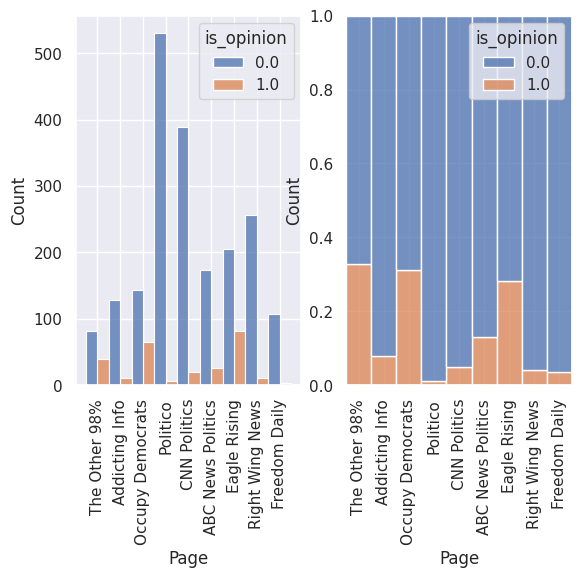

In [16]:
#order Category so that the graph x-axis labels are intuitive
posts['Page'] = pd.Categorical(posts['Page'], 
['The Other 98%','Addicting Info','Occupy Democrats',
 'Politico','CNN Politics','ABC News Politics',
 'Eagle Rising','Right Wing News','Freedom Daily'])

#create two sub plots for easier comparison at a glance
fig, axes = plt.subplots(1, 2)

#plt.xticks(rotation=90)

g1 = sns.histplot(data=posts, 
             x='Page', 
             hue='is_opinion', 
             multiple='dodge', 
            ax = axes[0])
g1.set_xticklabels(g1.get_xticklabels(), rotation=90)


g2 = sns.histplot(data=posts, 
             x='Page', 
             hue='is_opinion', 
             multiple='fill', 
            ax = axes[1])
g2.set_xticklabels(g2.get_xticklabels(), rotation=90)


### Conclusion
An important consideration is that while the graph above, particularly on the left-hand side of the page, may seem to indicate some normal distribution, this should be discounted as the varible is categorical, not continuous. The same applies for the graph in code block 83. While I have assigned numerical values to generate `rating_int`one must take extra care in recognising significance during interpretation.  

While this assessment contains no inference testing, it would be prudent to use a chi square test in this instance in comparing two categorical variables: `Category` and `rating`. Even still, the visualisations in this notebook suggest, in this dataset, there is an inverse correlation between Veracity (as defined in this notebook) and posts by left-wing Facebook pages - especially when measured realtively against posts by mainstream and right-wing Facebook pages.